In [63]:
import os
import pandas as pd

In [64]:
classes = ["notumor", "glioma", "meningioma", "pituitary"]
dirs = ["Training", "Testing"]
img_dir = "archive"
resized_dir = "resized"

if not os.path.exists(resized_dir):
    os.mkdir(resized_dir)

In [65]:
from cv2 import resize, imread, IMREAD_COLOR, imwrite


def process_images(file_dir: str, save_dir: str, size=(224, 224)):
    df = pd.DataFrame()
    image_paths = []
    labels = []

    for label, cl in enumerate(classes):
        save_class_dir = os.path.join(save_dir, cl)
        img_class_dir = os.path.join(file_dir, cl)

        for item in os.listdir(img_class_dir):
            item_path = os.path.join(img_class_dir, item)
            img = imread(item_path, IMREAD_COLOR)

            resized_img = resize(img, size)

            resized_path = os.path.join(save_class_dir, item)
            image_paths.append(resized_path)
            labels.append(label)
            imwrite(resized_path, resized_img)

    df["Brain_Image"] = image_paths
    df["Tumor"] = labels
    
    return df

In [66]:
def run(i):
    root = os.path.join(img_dir, i)
    save_dir = os.path.join(resized_dir, i)
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
        for cl in classes:
            class_dir = os.path.join(save_dir, cl)
            if not os.path.exists(class_dir):
                os.mkdir(class_dir)
    
    df = process_images(root, save_dir)
    df.to_csv(f'processed_data/{i.lower()}_data.csv', index=False)
    return df

In [67]:
train_df = run("Training")
test_df = run("Testing")

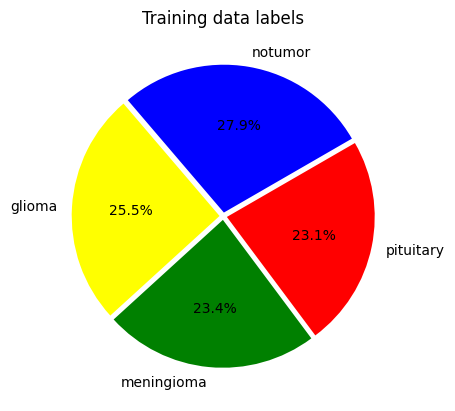

In [68]:
import matplotlib.pyplot as plt
colors = ['blue', 'yellow', 'green', 'red']

plt.pie(train_df['Tumor'].value_counts(), labels=classes, colors=colors,
        autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025), startangle=30)
plt.title('Training data labels')
pass

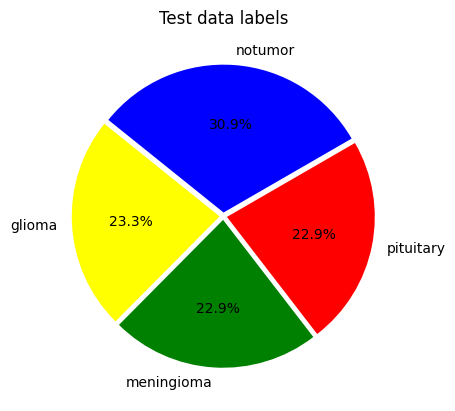

In [69]:
plt.pie(test_df['Tumor'].value_counts(), labels=classes, colors=colors,
        autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025), startangle=30)
plt.title('Test data labels')
pass